In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sb
import os

%matplotlib inline

In [2]:
files = [file for file in os.listdir('./DataSet')]
print(files)

dft = pd.DataFrame()

for file in files:
    #if file != '.DS_Store' and file != '.ipynb_checkpoints':
        months = pd.read_csv('./DataSet/'+file)
        dft = pd.concat([dft,months])

dft.to_csv('mergedData.csv',index = False, na_rep='(missing)')


['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [3]:
months=pd.read_csv('mergedData.csv')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"


In [4]:
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"


In [5]:
months.shape

(186850, 6)

# Data cleaning

In [6]:
months.loc[months['Product']=='(missing)']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,(missing),(missing),(missing),(missing),(missing),(missing)
648,(missing),(missing),(missing),(missing),(missing),(missing)
680,(missing),(missing),(missing),(missing),(missing),(missing)
1385,(missing),(missing),(missing),(missing),(missing),(missing)
1495,(missing),(missing),(missing),(missing),(missing),(missing)
...,...,...,...,...,...,...
185795,(missing),(missing),(missing),(missing),(missing),(missing)
185868,(missing),(missing),(missing),(missing),(missing),(missing)
185887,(missing),(missing),(missing),(missing),(missing),(missing)
185960,(missing),(missing),(missing),(missing),(missing),(missing)


In [7]:
months = months[months['Product'] !='(missing)']

In [8]:
months = months[months['Product'] != 'Product']

In [9]:
months.shape

(185950, 6)

# Save and load again

In [10]:
months.to_csv('mergedData.csv',index = False, na_rep = '(missing)')

In [11]:
months = pd.read_csv('mergedData.csv')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"


# Reorganizing the data

In [12]:
months.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [13]:
months['Hour'] = months['Order Date'].str[9:14]
months['Hour'] = months['Hour'].astype('str')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",00:01
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",07:03
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",18:21


In [14]:
months['Day'] = months['Order Date'].str[3:5]
months['Day'] = months['Day'].astype('int32')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Day
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",00:01,30
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",07:03,29
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",18:21,12


In [15]:
months['Month'] = months['Order Date'].str[:2]
months['Month'] = months['Month'].astype('int32')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Day,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",00:01,30,12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",07:03,29,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",18:21,12,12


In [16]:
months['Year'] = months['Order Date'].str[6:8]
months['Year'] = months['Year'].astype('int32')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Day,Month,Year
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",00:01,30,12,19
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",07:03,29,12,19
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",18:21,12,12,19


In [17]:
months['Order Date'] = pd.to_datetime(months['Order Date'])

In [18]:
months.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Hour                        object
Day                          int32
Month                        int32
Year                         int32
dtype: object

In [19]:
months[['Street', 'City', 'Zip']] = months['Purchase Address'].str.split(',', expand=True)

In [20]:
address = months['Purchase Address']
address.values[0].split(' ')

['136', 'Church', 'St,', 'New', 'York', 'City,', 'NY', '10001']

In [21]:
months = months.drop(columns=['Purchase Address'])

In [22]:
months['State'] = months['Zip'].str[:3]
months['State'] = months['State'].astype('str')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Day,Month,Year,Street,City,Zip,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,00:01,30,12,19,136 Church St,New York City,NY 10001,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,07:03,29,12,19,562 2nd St,New York City,NY 10001,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,18:21,12,12,19,277 Main St,New York City,NY 10001,NY


In [23]:
months['ZipCode'] = months['Zip'].str[3:8]
months['ZipCode'] = months['ZipCode'].astype('int32')
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Day,Month,Year,Street,City,Zip,State,ZipCode
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,00:01,30,12,19,136 Church St,New York City,NY 10001,NY,1000
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,07:03,29,12,19,562 2nd St,New York City,NY 10001,NY,1000
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,18:21,12,12,19,277 Main St,New York City,NY 10001,NY,1000


In [24]:
months['Sales'] = months['Price Each'] * months['Quantity Ordered']
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Day,Month,Year,Street,City,Zip,State,ZipCode,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,00:01,30,12,19,136 Church St,New York City,NY 10001,NY,1000,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,07:03,29,12,19,562 2nd St,New York City,NY 10001,NY,1000,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,18:21,12,12,19,277 Main St,New York City,NY 10001,NY,1000,11.95


In [25]:
months = months.drop(columns = ['Order Date'])

In [26]:
months = months.drop(columns = ['Zip'])

In [27]:
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Hour,Day,Month,Year,Street,City,State,ZipCode,Sales
0,295665,Macbook Pro Laptop,1,1700.00,00:01,30,12,19,136 Church St,New York City,NY,1000,1700.00
1,295666,LG Washing Machine,1,600.00,07:03,29,12,19,562 2nd St,New York City,NY,1000,600.00
2,295667,USB-C Charging Cable,1,11.95,18:21,12,12,19,277 Main St,New York City,NY,1000,11.95


# Save all the modifications

In [28]:
months.to_csv('mergedData.csv',index = False)

# Check the data

In [29]:
months = pd.read_csv('mergedData.csv')

In [30]:
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Hour,Day,Month,Year,Street,City,State,ZipCode,Sales
0,295665,Macbook Pro Laptop,1,1700.00,00:01,30,12,19,136 Church St,New York City,NY,1000,1700.00
1,295666,LG Washing Machine,1,600.00,07:03,29,12,19,562 2nd St,New York City,NY,1000,600.00
2,295667,USB-C Charging Cable,1,11.95,18:21,12,12,19,277 Main St,New York City,NY,1000,11.95
3,295668,27in FHD Monitor,1,149.99,15:13,22,12,19,410 6th St,San Francisco,CA,9401,149.99
4,295669,USB-C Charging Cable,1,11.95,12:38,18,12,19,43 Hill St,Atlanta,GA,3030,11.95


In [31]:
months.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Hour                 object
Day                   int64
Month                 int64
Year                  int64
Street               object
City                 object
State                object
ZipCode               int64
Sales               float64
dtype: object

In [32]:
months.reset_index(drop=True)

,Order ID,Product,Quantity Ordered,Price Each,Hour,Day,Month,Year,Street,City,State,ZipCode,Sales
0,295665,Macbook Pro Laptop,1,1700.00,00:01,30,12,19,136 Church St,New York City,NY,1000,1700.00
1,295666,LG Washing Machine,1,600.00,07:03,29,12,19,562 2nd St,New York City,NY,1000,600.00
2,295667,USB-C Charging Cable,1,11.95,18:21,12,12,19,277 Main St,New York City,NY,1000,11.95
3,295668,27in FHD Monitor,1,149.99,15:13,22,12,19,410 6th St,San Francisco,CA,9401,149.99
4,295669,USB-C Charging Cable,1,11.95,12:38,18,12,19,43 Hill St,Atlanta,GA,3030,11.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,19:02,7,6,19,795 Pine St,Boston,MA,221,2.99
185946,222906,27in FHD Monitor,1,149.99,19:29,1,6,19,495 North St,New York City,NY,1000,149.99
185947,222907,USB-C Charging Cable,1,11.95,18:57,22,6,19,319 Ridge St,San Francisco,CA,9401,11.95
185948,222908,USB-C Charging Cable,1,11.95,18:35,26,6,19,916 Main St,San Francisco,CA,9401,11.95


In [33]:
months.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Hour,Day,Month,Year,Street,City,State,ZipCode,Sales
0,295665,Macbook Pro Laptop,1,1700.00,00:01,30,12,19,136 Church St,New York City,NY,1000,1700.00
1,295666,LG Washing Machine,1,600.00,07:03,29,12,19,562 2nd St,New York City,NY,1000,600.00
2,295667,USB-C Charging Cable,1,11.95,18:21,12,12,19,277 Main St,New York City,NY,1000,11.95


In [34]:
months.tail(3)

,Order ID,Product,Quantity Ordered,Price Each,Hour,Day,Month,Year,Street,City,State,ZipCode,Sales
185947,222907,USB-C Charging Cable,1,11.95,18:57,22,6,19,319 Ridge St,San Francisco,CA,9401,11.95
185948,222908,USB-C Charging Cable,1,11.95,18:35,26,6,19,916 Main St,San Francisco,CA,9401,11.95
185949,222909,AAA Batteries (4-pack),1,2.99,14:33,25,6,19,209 11th St,Atlanta,GA,3030,2.99


In [35]:
months.shape

(185950, 13)

In [36]:
months.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Hour                 object
Day                   int64
Month                 int64
Year                  int64
Street               object
City                 object
State                object
ZipCode               int64
Sales               float64
dtype: object

# Analyze the data

### Amount of sales

In [37]:
"""The number of rows is given by '185950 entries' and it matches the number obtained with 'months.shape'.
There are 13 columns, their names and types are given.
A summary 'dtypes: float64(2), int64(6), object(5)' of the data types in this data set is provided"""
print(months.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
Order ID            185950 non-null int64
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Hour                185950 non-null object
Day                 185950 non-null int64
Month               185950 non-null int64
Year                185950 non-null int64
Street              185950 non-null object
City                185950 non-null object
State               185950 non-null object
ZipCode             185950 non-null int64
Sales               185950 non-null float64
dtypes: float64(2), int64(6), object(5)
memory usage: 18.4+ MB
None


In [38]:
# dataframe, column, method. Use this synthax to make an operation on a particular column.
"""The total amount of sales for this products, locations and period of time is of approx. 34.5 million USD"""
months.Sales.sum()

34492035.97

### The products being analyzed

In [154]:
SingleProducts = []
for i in months.Product:
    if i in SingleProducts:
        pass
    else:
        SingleProducts.append(i)

product = np.asarray(SingleProducts) # Converts the list into a np.array
productCol = pd.Series(product) # Converts the np.array into a pd.Series (the type of a column)
print(type(productCol)) # Same type as months[Product], for example.
print(productCol)
"""This shows that there are 19 unique products"""

<class 'pandas.core.series.Series'>
0             Macbook Pro Laptop
1             LG Washing Machine
2           USB-C Charging Cable
3               27in FHD Monitor
4          AA Batteries (4-pack)
5     Bose SoundSport Headphones
6         AAA Batteries (4-pack)
7                ThinkPad Laptop
8       Lightning Charging Cable
9                   Google Phone
10              Wired Headphones
11      Apple Airpods Headphones
12               Vareebadd Phone
13                        iPhone
14                  20in Monitor
15        34in Ultrawide Monitor
16                 Flatscreen TV
17        27in 4K Gaming Monitor
18                      LG Dryer
dtype: object


'This shows that there are 19 unique products'

### Prices per product

In [329]:
orderProdPerPrice = months.groupby(['Product']).mean().sort_values('Sales', ascending = False) # The 19 products.
orderedPrices = orderProdPerPrice['Price Each'] # This is a <class 'pandas.core.frame.DataFrame'>
print(orderedPrices)
"""The most expensive product is the Macbook Pro Laptop and the cheapest is the AAA Batteries (4-pack)"""

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
USB-C Charging Cable            11.95
Wired Headphones                11.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64


'The most expensive product is the Macbook Pro Laptop and the cheapest is the AAA Batteries (4-pack)'

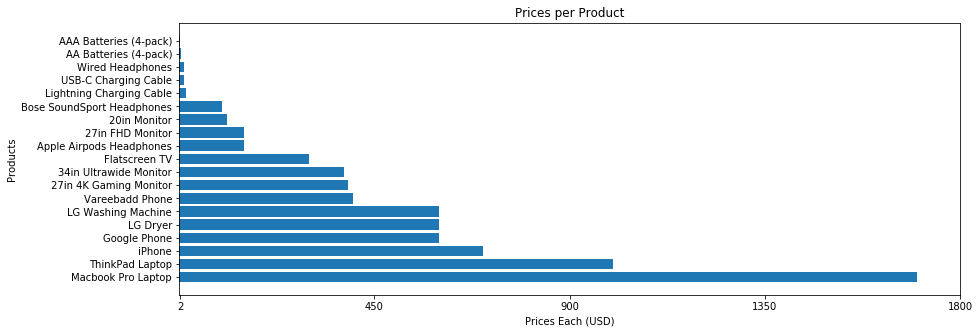

In [190]:
plt.figure(figsize=(14, 5)) # This allows me to change the figure size, so the data is not cramped.
plt.barh(orderedPrices.index, orderedPrices)
#plt.xscale('log')
plt.ylabel('Products')
plt.xlabel('Prices Each (USD)')
plt.title('Prices per Product')
tick_val = [2,450,900,1350,1800]
tick_lab = ['2','450','900','1350','1800']
plt.xticks(tick_val, tick_lab)
plt.show()

In [273]:
import re
macProducts = months.loc[months['Product'].str.contains('Macbook Pro Laptop|iPhone', regex=True)]
macProductStateSales = macProducts.groupby(['State']).sum().sort_values('Sales', ascending = False)
macProductSales = macProductStateSales['Sales']
print(macProductSales)
"""Most mac products were sold in the state of California, with a good difference compared to other states"""

State
 CA    5153200.0
 NY    1733600.0
 TX    1703300.0
 MA    1341400.0
 GA    1025100.0
 WA     987400.0
 OR     725500.0
 ME     162400.0
Name: Sales, dtype: float64


### Amount of items sold per Product

In [196]:
amountProdSold = months.groupby(['Product']).sum().sort_values('Quantity Ordered', ascending = False) # The 19 products.
totalItemsProduct = amountProdSold['Quantity Ordered'] # This is a <class 'pandas.core.frame.DataFrame'>
print(totalItemsProduct)
"""The best sold product is the AAA Batteries (4-pack) and the least sold is the LG Dryer"""

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


'The best sold product is the AAA Batteries (4-pack) and the least sold is the LG Dryer'

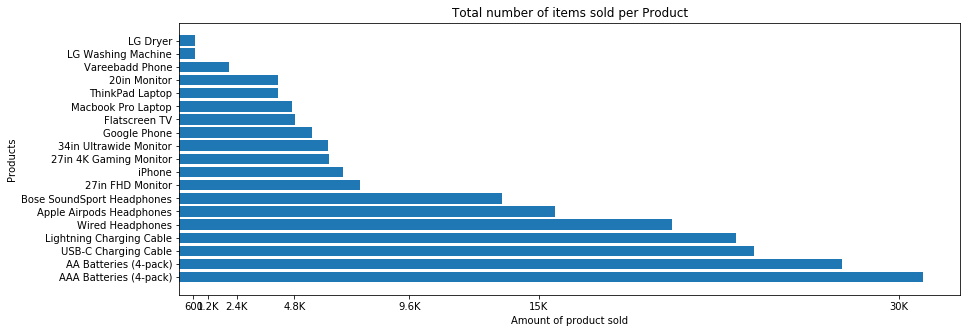

In [197]:
plt.figure(figsize=(14, 5)) # This allows me to change the figure size, so the data is not cramped.
plt.barh(totalItemsProduct.index, totalItemsProduct)
#plt.xscale('log')
plt.ylabel('Products')
plt.xlabel('Amount of product sold')
plt.title('Total number of items sold per Product')
tick_val = [600,1.2e3,2.4e3,4.8e3,9.6e3,1.5e4,3e4]
tick_lab = ['600','1.2K','2.4K','4.8K','9.6K','15K','30K']
plt.xticks(tick_val, tick_lab)
plt.show()

### Total Sales per Product

In [225]:
orderSalesProd = months.groupby(['Product']).sum().sort_values('Sales', ascending = False) # This is a pd df
mostSales = orderSalesProd['Sales']
print(mostSales) # This is a class 'pandas.core.series.Series'
"""The Macbook Pro Laptops sold during this time period and places add an approx 8 million USD"""

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64


'The Macbook Pro Laptops sold during this time period and places add an approx 8 million USD'

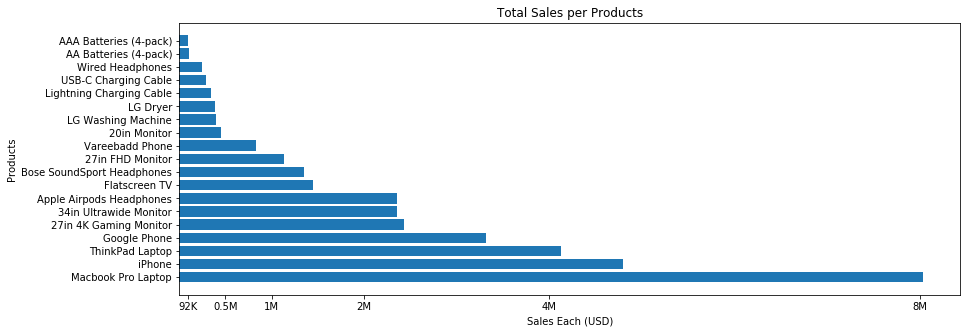

In [186]:
plt.figure(figsize=(14, 5)) # This allows me to change the figure size, so the data is not cramped.
plt.barh(mostSales.index, mostSales)
#plt.xscale('log')
plt.ylabel('Products')
plt.xlabel('Sales Each (USD)')
plt.title('Total Sales per Products')
tick_val = [9.2e4,0.5e6,1e6,2e6,4e6,8e6]
tick_lab = ['92K','0.5M','1M','2M','4M','8M']
plt.xticks(tick_val, tick_lab)
plt.show()

### Summary 1: Product analysis

In [418]:
dfag = months.groupby("Product").agg({"Quantity Ordered":"sum","Sales":"sum","Price Each":"max"})
print(dfag)

                            Quantity Ordered       Sales  Price Each
Product                                                             
20in Monitor                            4129   454148.71      109.99
27in 4K Gaming Monitor                  6244  2435097.56      389.99
27in FHD Monitor                        7550  1132424.50      149.99
34in Ultrawide Monitor                  6199  2355558.01      379.99
AA Batteries (4-pack)                  27635   106118.40        3.84
AAA Batteries (4-pack)                 31017    92740.83        2.99
Apple Airpods Headphones               15661  2349150.00      150.00
Bose SoundSport Headphones             13457  1345565.43       99.99
Flatscreen TV                           4819  1445700.00      300.00
Google Phone                            5532  3319200.00      600.00
LG Dryer                                 646   387600.00      600.00
LG Washing Machine                       666   399600.00      600.00
Lightning Charging Cable          

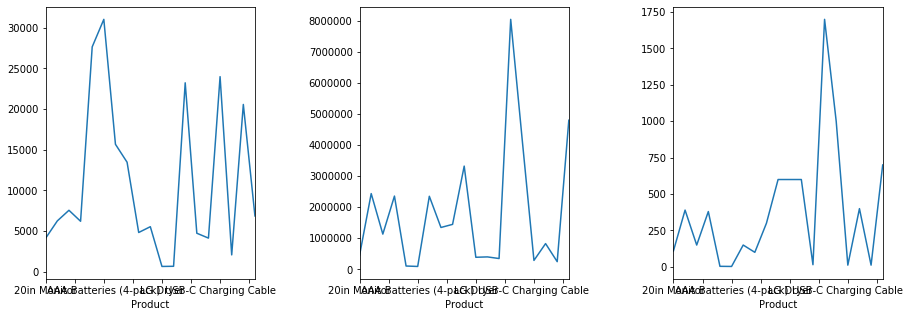

In [475]:
fig = plt.figure(figsize=(15,5))
ax0=fig.add_subplot(131)
ax1=fig.add_subplot(132)
ax2=fig.add_subplot(133)
dfag["Quantity Ordered"].plot(ax = ax0)
dfag["Sales"].plot(ax = ax1)
dfag["Price Each"].plot(ax = ax2)

fig.subplots_adjust(wspace = 0.5)
#plt.show()

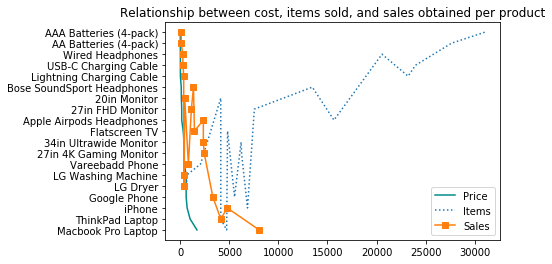

'The most expensive (green) products add more sales (orange), although less items (blue) are sold'

In [467]:
Mod_mostSales = mostSales/1000
Mod_totalItemsProduct = amountProdSold/1000
plt.plot(orderedPrices, orderedPrices.index, label = "Price", color="DarkCyan")
plt.plot(totalItemsProduct, totalItemsProduct.index, label = "Items", linestyle = ':')
plt.plot(Mod_mostSales, mostSales.index, label = "Sales", marker = 's')
plt.legend()
plt.title('Relationship between cost, items sold, and sales obtained per product')
plt.show()
"""The most expensive (green) products add more sales (orange), although less items (blue) are sold"""

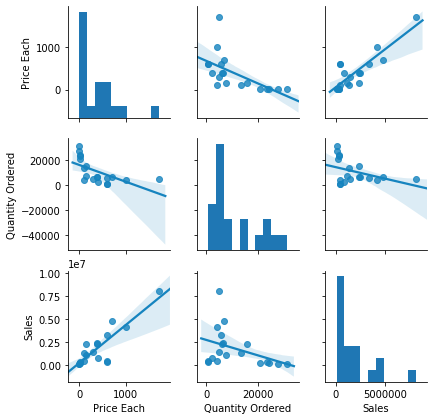

In [323]:
sb.pairplot(summary1[['Price Each', 'Quantity Ordered', 'Sales']], plot_kws={'color':'#1684BF'}, height=2, kind='reg')
"""Negative correlation of Quantity Order with Price Each, and Sales. Possitive between Sales and Price Each"""

### Cost of products in Sales Brackets

In [264]:
# Selecting a column can be done with any of the following two methods.
# Method 1: salesCol = months.Sales, it works if the column name contains letters, numbers, or underscore.
# Method 2: Using square brackets, it works if the column name contains spaces or spacial characters.
# For this column name any of the two methods would work. Here I am using method 2:

salesCol = months['Sales'] # salesCol is a <class 'pandas.core.series.Series'>
# print(salesCol)
"""There are 185950 sales events"""

'There are 185950 sales events'

In [265]:
cheap = salesCol < 100
cheapProd = months[cheap]
print(cheapProd.head(3))  # Using cheapProd.info() I obtained that there are 116856 sales (rows)
"""Approx 63% (116856) of total sales is comprised by products that cost less than 100 USD"""

   Order ID                Product  Quantity Ordered  Price Each   Hour  Day  \
2    295667   USB-C Charging Cable                 1       11.95  18:21   12   
4    295669   USB-C Charging Cable                 1       11.95  12:38   18   
5    295670  AA Batteries (4-pack)                 1        3.84  22:58   31   

   Month  Year            Street            City State  ZipCode  Sales  
2     12    19       277 Main St   New York City    NY     1000  11.95  
4     12    19        43 Hill St         Atlanta    GA     3030  11.95  
5     12    19  200 Jefferson St   New York City    NY     1000   3.84  


'Approx 63% (116856) of total sales is comprised by products that cost less than 100 USD'

In [44]:
cheapProdSales = months[cheap].sum()
print(cheapProdSales['Sales'])
"""The total sale of products in the cheap bracket is of 2.40 million USD"""

2398301.1100006807


'The total sale of products in the cheap bracket is of 2.40 million USD'

In [45]:
pricey = np.logical_and(salesCol > 100, salesCol < 500) # This is a <class 'pandas.core.series.Series'>
priceyProd = months[pricey] # This is a <class 'pandas.core.frame.DataFrame'>
print(priceyProd.head(3)) # Using priceyProd.info() I obtained that there are 46509 sales (rows)
"""Approx 25% (46509) of total sales is comprised by products that cost between 100 and 500 USD"""

    Order ID                   Product  Quantity Ordered  Price Each   Hour  \
3     295668          27in FHD Monitor                 1      149.99  15:13   
25    295687  Apple Airpods Headphones                 1      150.00  00:38   
26    295688  Apple Airpods Headphones                 1      150.00  11:21   

    Day  Month  Year        Street            City State  ZipCode   Sales  
3    22     12    19    410 6th St   San Francisco    CA     9401  149.99  
25   10     12    19  531 Ridge St          Boston    MA      221  150.00  
26    8     12    19   546 Park St     Los Angeles    CA     9000  150.00  


'Approx ~25% (46509) of total sales is comprised by products that cost between 100 and 500 USD'

In [46]:
priceyProdSales = months[pricey].sum()
print(priceyProdSales['Sales'])
"""The total sale of products in the pricey bracket is of approx 10.99 million USD"""

10987076.800004348


'The total sale of products in the pricey bracket is of approx 10.99 million USD'

In [47]:
expensive = salesCol > 500
expensiveProd = months[expensive]
print(expensiveProd.head(3)) # Using expensiveProd.info() I obtained that there are 22585 sales (rows).
"""Approx 12% ( 22585) of total sales is comprised by products that cost more than 500 USD"""

    Order ID             Product  Quantity Ordered  Price Each   Hour  Day  \
0     295665  Macbook Pro Laptop                 1     1700.00  00:01   30   
1     295666  LG Washing Machine                 1      600.00  07:03   29   
11    295676     ThinkPad Laptop                 1      999.99  17:19   28   
16    295681        Google Phone                 1      600.00  12:37   25   
27    295689  LG Washing Machine                 1      600.00  11:21   24   

    Month  Year          Street            City State  ZipCode    Sales  
0      12    19   136 Church St   New York City    NY     1000  1700.00  
1      12    19      562 2nd St   New York City    NY     1000   600.00  
11     12    19  410 Lincoln St     Los Angeles    CA     9000   999.99  
16     12    19       79 Elm St          Boston    MA      221   600.00  
27     12    19     173 Lake St   San Francisco    CA     9401   600.00  


'Approx ~12% ( 22585) of total sales is comprised by products that cost between more than 500 USD'

In [48]:
expensiveProdSales = months[expensive].sum()
print(expensiveProdSales['Sales'])
"""The total sale of products in the expensive bracket is of approx 21.11 million USD"""

21106658.059999242


'The total sale of products in the expensive bracket is of approx 21.11 million USD'

### Summary 2: Sales analysis

In [263]:
salesBracketsLabels = 'Expensive', 'Pricey', 'Cheap'
salesBrackets = expensiveProdSales['Sales'], priceyProdSales['Sales'], cheapProdSales['Sales']
print(salesBrackets)
row_labels = ['Number of Products','Sales Amount (%) from the Total', 'Amount of money in Sales (Million USD)']
my_dict = {'Cheap':[6,63,2.40], 'Pricey':[7,25,10.99], 'Expensive':[6,12,21.11]}
summary2 = pd.DataFrame(my_dict)
summary2.index = row_labels
print()
print(summary)
#print(type(summary))

"""The effort in the sales of cheap products does not compare to the expensive products"""

(21106658.059999242, 10987076.800004348, 2398301.1100006807)

                                        Cheap  Pricey  Expensive
Number of Products                        6.0    7.00       6.00
Sales Amount (%) from the Total          63.0   25.00      12.00
Amount of money in Sales (Million USD)    2.4   10.99      21.11


'The effort in the sales of cheap products does not compare to the expensive products'

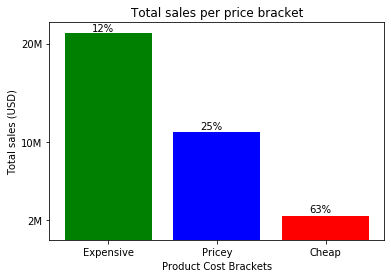

'Almost double the amount of sales of expensive products compared to pricey products.\nHowever it is important to consider the location requierements to calculate the profit.\nFor these expensive products the locale has to be bigger than for pricey products, requiring higher rent cost'

In [174]:
plt.bar(salesBracketsLabels, salesBrackets, color=['green', 'blue', 'red'])

plt.xlabel('Product Cost Brackets')
plt.ylabel('Total sales (USD)')
plt.title('Total sales per price bracket')
tick_val = [2000000,10000000,20000000]
tick_lab = ['2M','10M','20M']
plt.yticks(tick_val, tick_lab)

plt.text(width-0.5, 21300000, '12%')
plt.text(width+0.5, 11300000, '25%')
plt.text(width+1.5, 2800000, '63%')

plt.show()
"""Almost double the amount of money in sales of expensive products compared to pricey products.
However it is important to consider the location requierements to calculate the profit.
For these expensive products the locale has to be bigger than for pricey products, requiring higher rent cost"""

### Total Sales By Location: State

In [390]:
orderProdPerState = months.groupby(['State']).sum().sort_values('Sales', ascending = False)
stateSales = orderProdPerState['Sales'] # This is a <class 'pandas.core.frame.DataFrame'>
print(stateSales)
"""There are 8 states. The one with the most sales is California and with the least sales is Maine."""

State
 CA    1.371477e+07
 NY    4.664317e+06
 TX    4.587557e+06
 MA    3.661642e+06
 GA    2.795499e+06
 WA    2.747755e+06
 OR    1.870732e+06
 ME    4.497583e+05
Name: Sales, dtype: float64


'There are 8 states. The one with the most sales is California and with the least sales is Maine.'

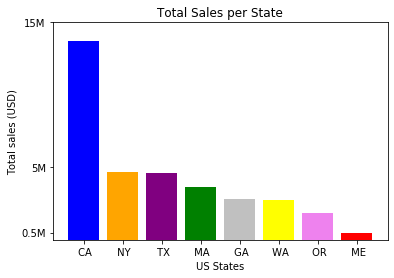

In [183]:
plt.bar(stateSales.index,stateSales, color=['blue','orange','purple','green','silver','yellow','violet','red'])
plt.xlabel('US States')
plt.ylabel('Total sales (USD)')
plt.title('Total Sales per State')
tick_val = [500000,5000000,15000000]
tick_lab = ['0.5M','5M','15M']
plt.yticks(tick_val, tick_lab)
plt.show()

### Total Sales By Location: Cities

In [303]:
SingleCities = []
for i in months.City:
    if i in SingleCities:
        pass
    else:
        SingleCities.append(i)

city = np.asarray(SingleCities) # Converts the list into a np.array
cityCol = pd.Series(city) # Converts the np.array into a pd.Series (the type of a column)
print(type(cityCol)) # Same type as months[Product], for example.
print(cityCol)

"""There are 9 cities, one in each State, except for TX that has 2 cities is TX"""

<class 'pandas.core.series.Series'>
0     New York City
1     San Francisco
2           Atlanta
3          Portland
4            Dallas
5       Los Angeles
6            Boston
7            Austin
8           Seattle
dtype: object


'There are 9 cities, one in each State, except for TX that has 2 cities is TX'

In [304]:
txCities = months.loc[months['City'].str.contains('Dallas|Austin', regex=True)]
txCitiesSales = txCities.groupby(['City']).sum().sort_values('Sales', ascending = False)
citySales = txCitiesSales['Sales']
print(citySales)

"""The cities with the best sales are San Francisco, New York City and Dallas"""

City
 Dallas    2767975.40
 Austin    1819581.75
Name: Sales, dtype: float64


### Time Analysis

'The best sales were achieved from April through June, although those months seem to have outlier values.\nOtherwise, the best sales were achieved in January and October. Surprisingly December does have the best sales'

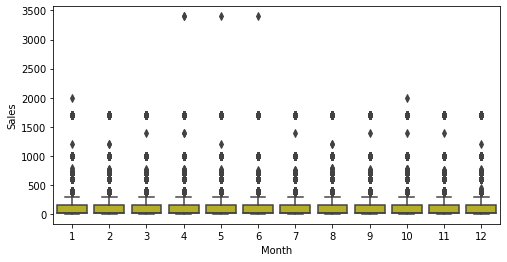

In [322]:
plt.figure(figsize=(8,4)) # This allows me to change the figure size, so the data is not cramped.
sb.boxplot(x='Month', y='Sales',data= months, color='#CBC311')
#sb.stripplot(x = 'Month', y = 'Sales', data = months, color='red')
"""The best sales were achieved from April through June, although those months seem to have outlier values.
Otherwise, the best sales were achieved in January and October. Surprisingly December does have the best sales"""

### Basic statistical analysis

In [1]:
import MyStatsFunctions as msf

In [333]:
medianaSales = months['Sales'].median()
print(medianSales)

14.95


The mean of total sales is: 185.49091675145314
The Mean of Cheap Sales Bracket: 20.523559851446915
The Mean of Pricey Sales Bracket: 236.23549850575907
The Mean of Expensive Sales Bracket: 934.5431950409228


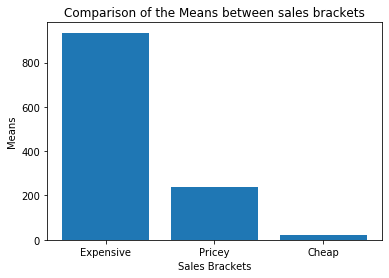

'There is a large difference between the means'

In [388]:
Mean_cheapProdSales = months[cheap].promedio()
MeanCheap = Mean_cheapProdSales['Sales']

Mean_priceyProdSales = months[pricey].promedio()
MeanPricey = Mean_priceyProdSales['Sales']

Mean_expensiveProdSales = months[expensive].promedio()
MeanExpensive = Mean_expensiveProdSales['Sales']

meanSales = months['Sales'].promedio()

print('The mean of total sales is: ' + str(meanSales))
print('The Mean of Cheap Sales Bracket: ' + str(MeanCheap))
print('The Mean of Pricey Sales Bracket: ' + str(MeanPricey))
print('The Mean of Expensive Sales Bracket: ' + str(MeanExpensive))

salesBracketsLabels = 'Expensive', 'Pricey', 'Cheap'
salesBracketsMeans = Mean_expensiveProdSales['Sales'], Mean_priceyProdSales['Sales'], Mean_cheapProdSales['Sales']

plt.bar(salesBracketsLabels, salesBracketsMeans)
plt.title('Comparison of the Means between sales brackets')
plt.ylabel('Means')
plt.xlabel('Sales Brackets')
plt.show()

"""There is a large difference between the means"""

### Test if the difference between the means is significant

In [3]:
dir(msf)

['SEM',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'mean',
 'median',
 'randomSamples',
 'sigDif',
 'stDev',
 'var']

In [2]:
msf.sigDif(MeanPricey,MeanExpensive) 

NameError: name 'MeanPricey' is not defined

The variance of the total sales is: 110835.57417998869
variance of Cheap Sales Bracket: 833.8782186596105
variance of Pricey Sales Bracket: 12581.507244021654
variance of Expensive Sales Bracket: 175137.13586601202


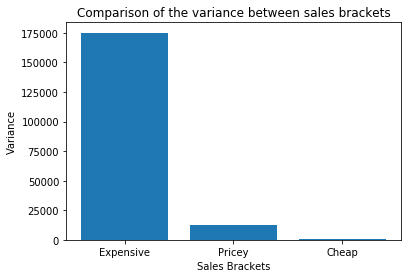

'The variance of the Expensive Sales Bracket is very large'

In [387]:
var_cheapProdSales = months[cheap].varianza()
varCheap = var_cheapProdSales['Sales']

var_priceyProdSales = months[pricey].varianza()
varPricey = var_priceyProdSales['Sales']

var_expensiveProdSales = months[expensive].varianza()
varExpensive = var_expensiveProdSales['Sales']

varSales = months['Sales'].varianza()

print('The variance of the total sales is: ' + str(varSales))
print('variance of Cheap Sales Bracket: ' + str(varCheap))
print('variance of Pricey Sales Bracket: ' + str(varPricey))
print('variance of Expensive Sales Bracket: ' + str(varExpensive))

salesBracketsLabels = 'Expensive', 'Pricey', 'Cheap'
salesBracketsVar = var_expensiveProdSales['Sales'], var_priceyProdSales['Sales'], var_cheapProdSales['Sales']

plt.bar(salesBracketsLabels, salesBracketsVar)
plt.title('Comparison of the variance between sales brackets')
plt.ylabel('Variance')
plt.xlabel('Sales Brackets')
plt.show()

"""The variance of the Expensive Sales Bracket is very large"""